In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Asistance

## Class Neural Network

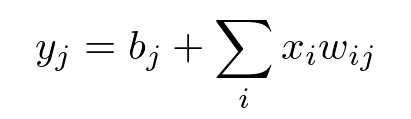

Derivative

---


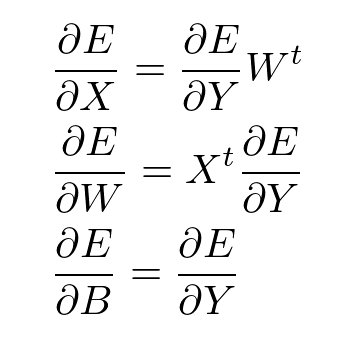

Update weights and bias

---


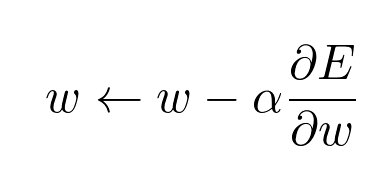

In [ ]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        # print(input.shape, self.weights.shape)
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(input_error.T, output_error)
        # bias_error = output_error

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

Activation function (Forward)

---

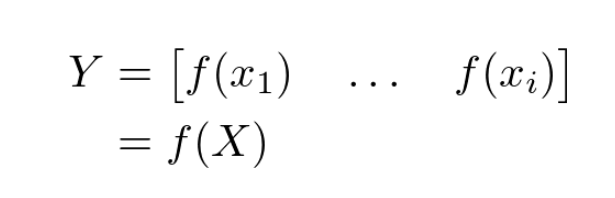



Activation function (Backward)

---

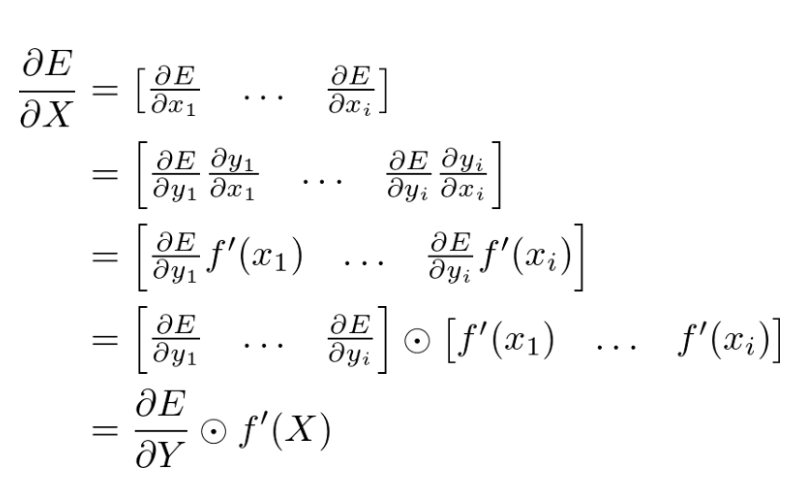

In [ ]:
class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(input)

    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)

In [ ]:
# bonus
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))

    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

In [ ]:
# bonus
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size

    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        # print(output_error.shape, out.shape)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

In [ ]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def sse_prime(y_true, y_pred):
    return y_pred - y_true

### EDA

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df['Target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def boxplot(df):
    sns.set(rc={'figure.figsize':(30,9)})
    sns.boxplot(x="variable", y="value", data=pd.melt(df[df.columns]))

    plt.show()

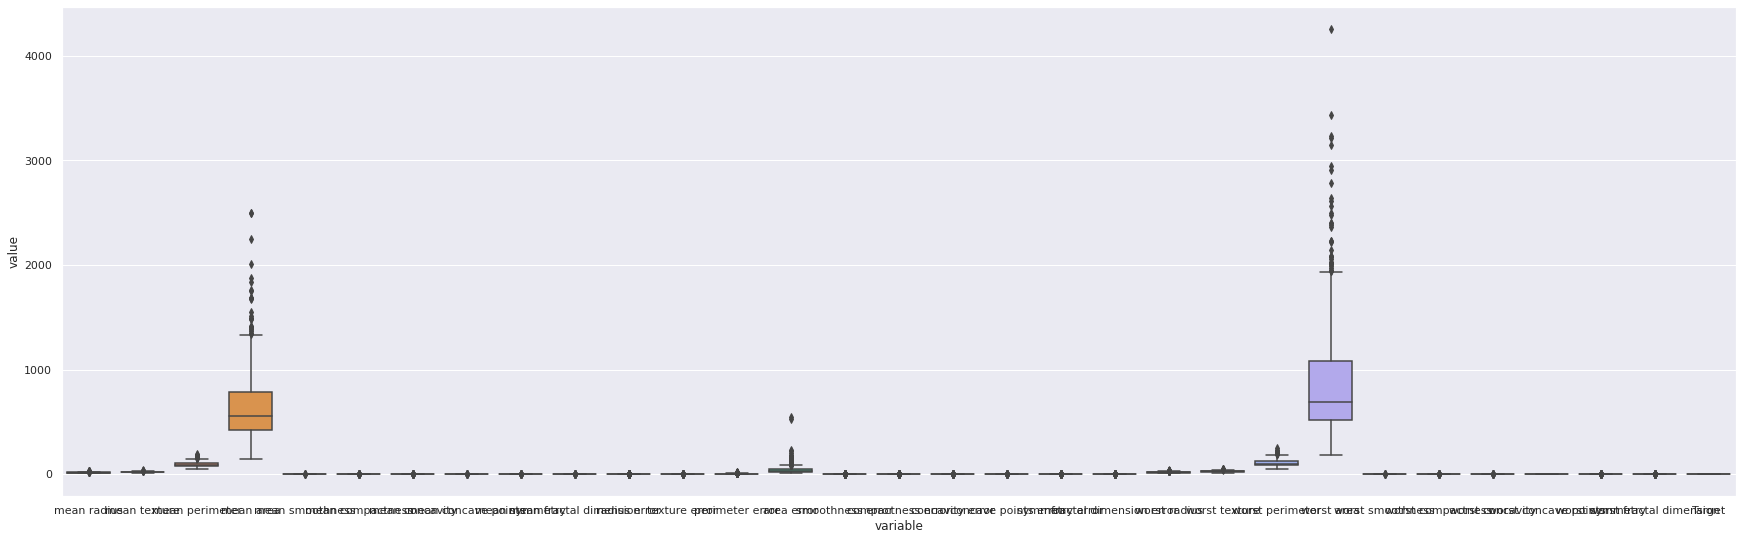

In [ ]:
boxplot(df)

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df[df.columns[:-1]]))

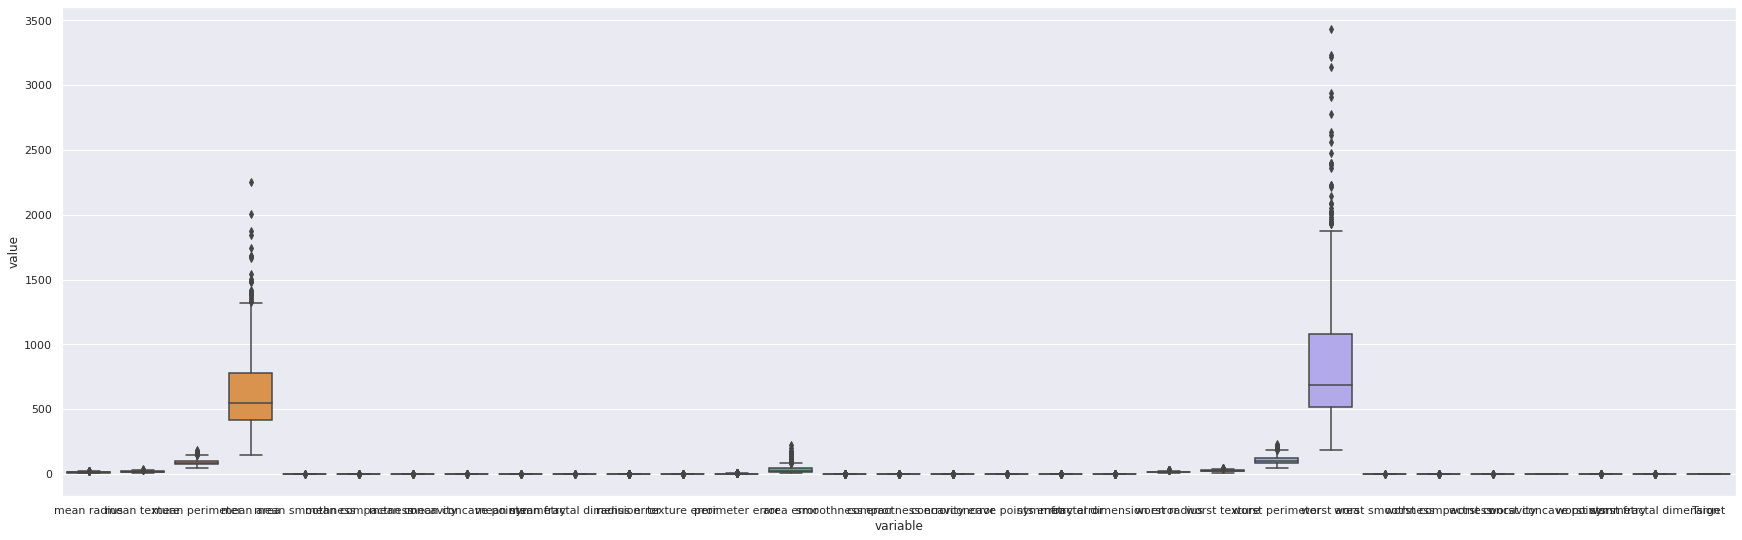

In [ ]:
df1 = df[(z < 5).all(axis=1)]

sns.set(rc={'figure.figsize':(30,9)})
sns.boxplot(x="variable", y="value", data=pd.melt(df1[df1.columns]))

plt.show()

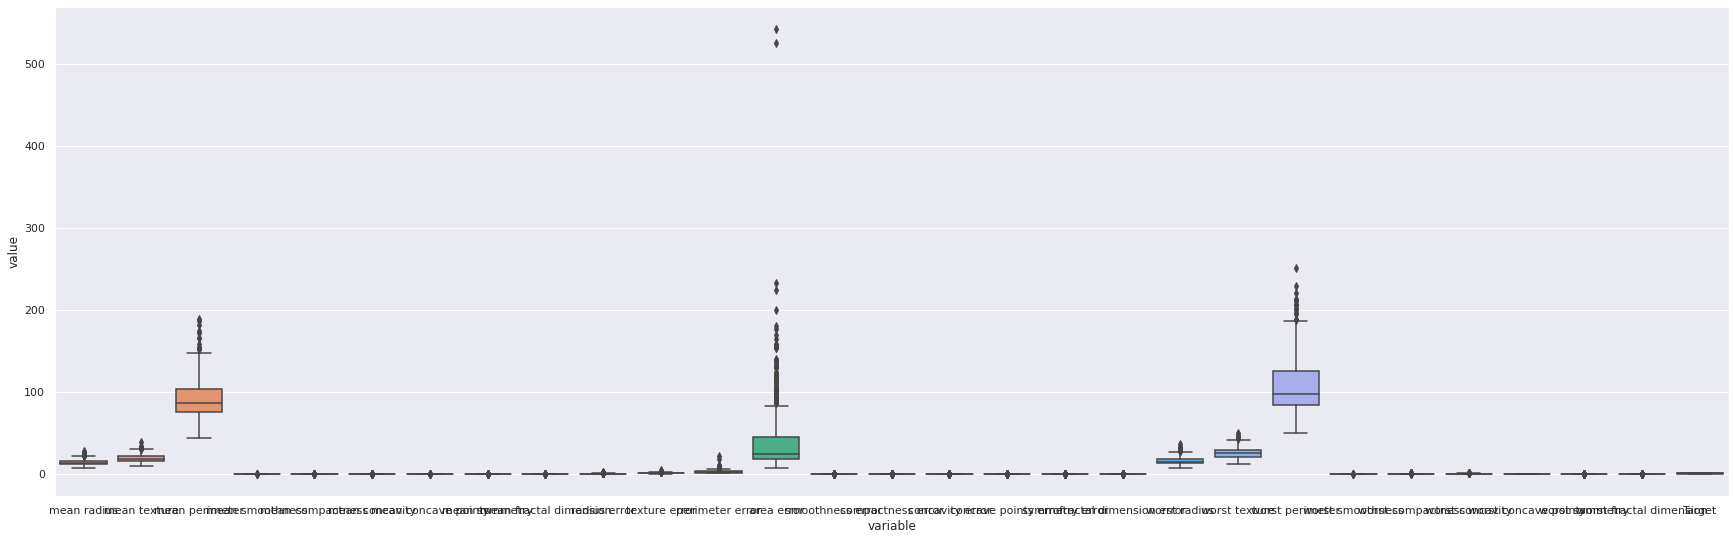

In [ ]:
df2 = df.drop(['worst area', 'mean area'], axis=1)
boxplot(df2)

In [ ]:
z = np.abs(stats.zscore(df[df.columns[:-1]]))
df2 = df2[(z<5).all(axis=1)]
len(df2)

555

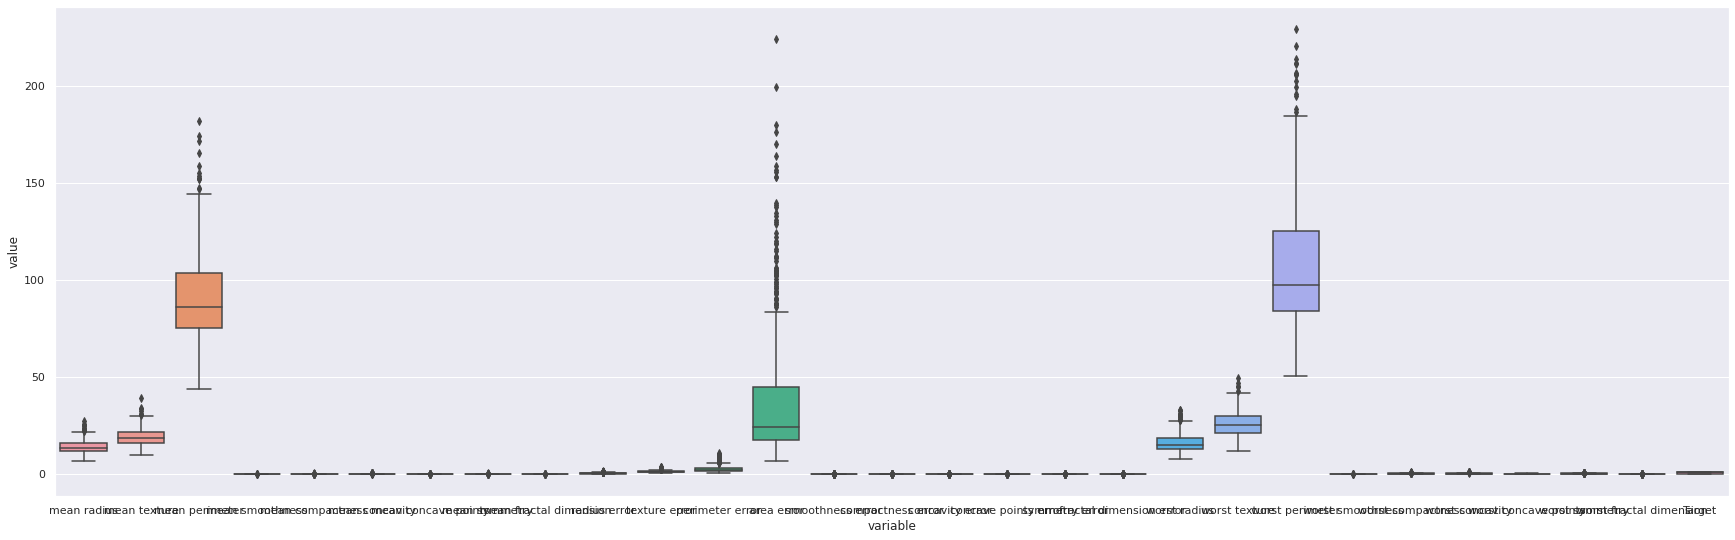

In [ ]:
boxplot(df2)

In [ ]:
from sklearn.model_selection import train_test_split
x = df2[df2.columns[:-1]]
y = df2[df2.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=2)

In [ ]:
x_train, x_test = np.asarray(x_train), np.asarray(x_test)
y_train, t_test = np.asarray(y_train), np.asarray(y_test)

In [ ]:
pad_train = np.zeros(y_train.shape)

In [ ]:
y_train = np.stack((y_train, pad_train), axis=-1)

In [ ]:
for i in range(len(y_train)):
    if y_train[i][0]==0:
        y_train[i][1]=1
    else:
        y_train[i][1]=0

### Fit and Predict

In [ ]:
# unlike the Medium article, I am not encapsulating this process in a separate class
# I think it is nice just like this
network = [
    FlattenLayer(input_shape=(28,)),
    FCLayer(28, 32),
    ActivationLayer(relu, relu_prime),
    FCLayer(32, 64),
    ActivationLayer(tanh, tanh_prime),
    FCLayer(64, 32),
    ActivationLayer(sigmoid, sigmoid_prime),
    FCLayer(32, 2),
    SoftmaxLayer(2)
]

epochs = 40
learning_rate = 0.1

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        # forward
        output = x
        # print(output.shape, y_true.shape)
        for layer in network:
            output = layer.forward(output)
            # print(output.shape)

        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)

    error /= len(x_train)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/40, error=0.238400
2/40, error=0.236270
3/40, error=0.236260
4/40, error=0.236260
5/40, error=0.236260
6/40, error=0.236260
7/40, error=0.236260
8/40, error=0.236260
9/40, error=0.236260
10/40, error=0.236260
11/40, error=0.236260
12/40, error=0.236260
13/40, error=0.236260
14/40, error=0.236260
15/40, error=0.236260
16/40, error=0.236260
17/40, error=0.236260
18/40, error=0.236260
19/40, error=0.236260
20/40, error=0.236260
21/40, error=0.236260
22/40, error=0.236260
23/40, error=0.236260
24/40, error=0.236260
25/40, error=0.236260
26/40, error=0.236260
27/40, error=0.236260
28/40, error=0.236260
29/40, error=0.236260
30/40, error=0.236260
31/40, error=0.236260
32/40, error=0.236260
33/40, error=0.236260
34/40, error=0.236260
35/40, error=0.236260
36/40, error=0.236260
37/40, error=0.236260
38/40, error=0.236260
39/40, error=0.236260
40/40, error=0.236260


In [ ]:
pad_test = np.zeros(y_test.shape)

In [ ]:
y_test = np.stack((y_test, pad_test), axis=-1)

In [ ]:
for i in range(len(y_test)):
    if y_test[i][0]==0:
        y_test[i][1]=1
    else:
        y_test[i][1]=0

In [ ]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

# [np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]
for x, y in zip(x_test, y_test):
    print(np.argmax(predict(network, x)))

# ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
# error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
# print('ratio: %.2f' % ratio)
# print('mse: %.4f' % error)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


# ANN TF

### EDA

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df['Target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def boxplot(df):
    sns.set(rc={'figure.figsize':(30,9)})
    sns.boxplot(x="variable", y="value", data=pd.melt(df[df.columns]))

    plt.show()

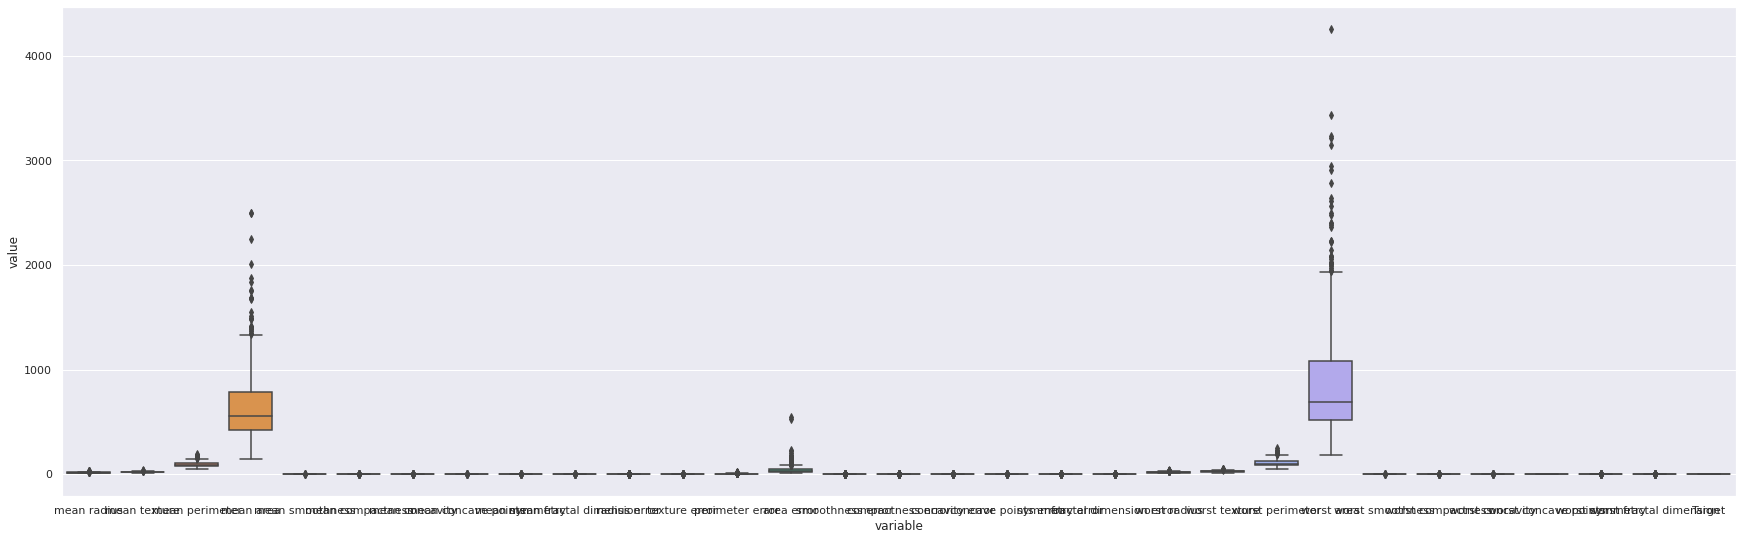

In [ ]:
boxplot(df)

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df[df.columns[:-1]]))

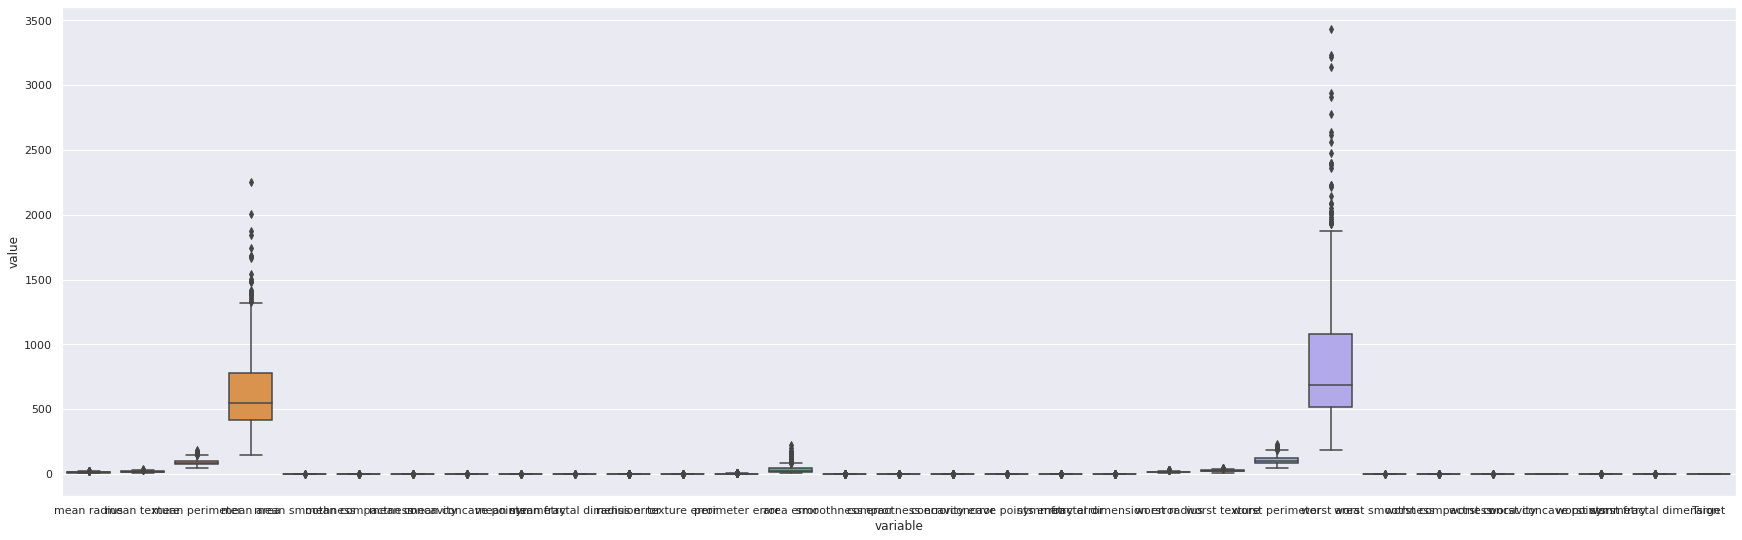

In [ ]:
df1 = df[(z < 5).all(axis=1)]

sns.set(rc={'figure.figsize':(30,9)})
sns.boxplot(x="variable", y="value", data=pd.melt(df1[df1.columns]))

plt.show()

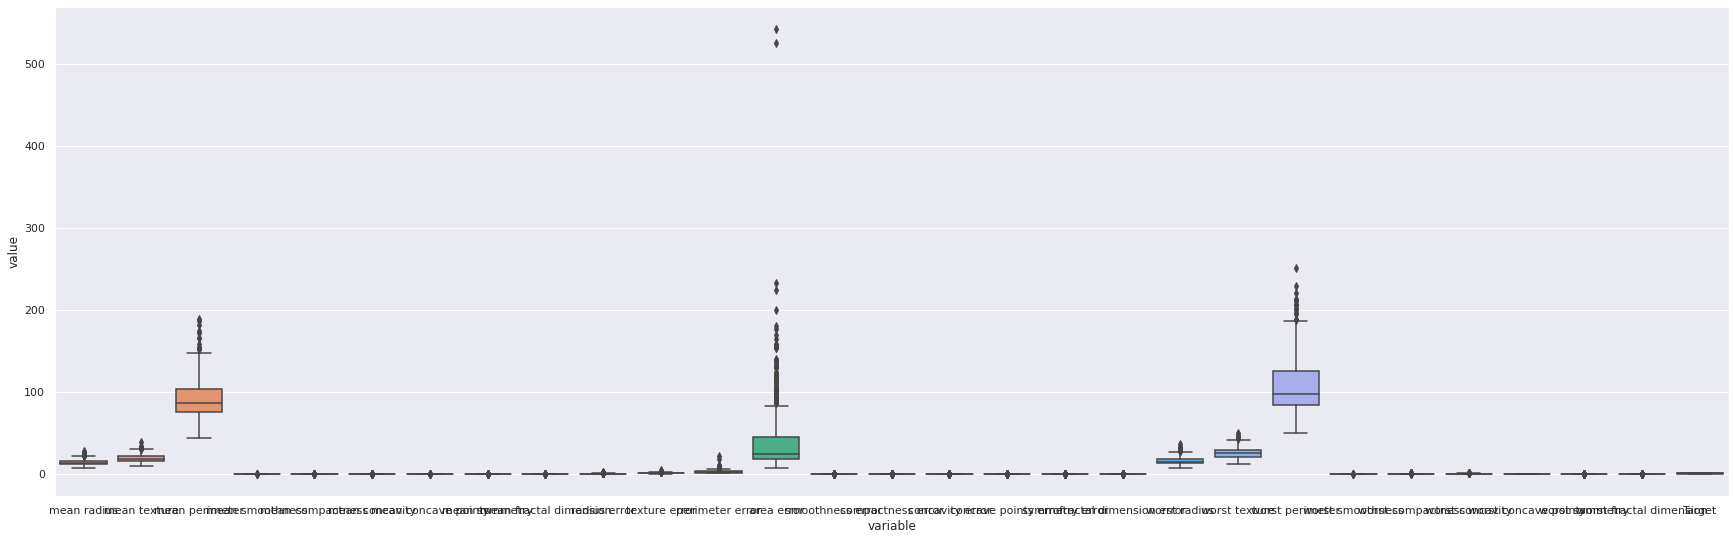

In [ ]:
df2 = df.drop(['worst area', 'mean area'], axis=1)
boxplot(df2)

In [ ]:
z = np.abs(stats.zscore(df[df.columns[:-1]]))
df2 = df2[(z<5).all(axis=1)]
len(df2)

555

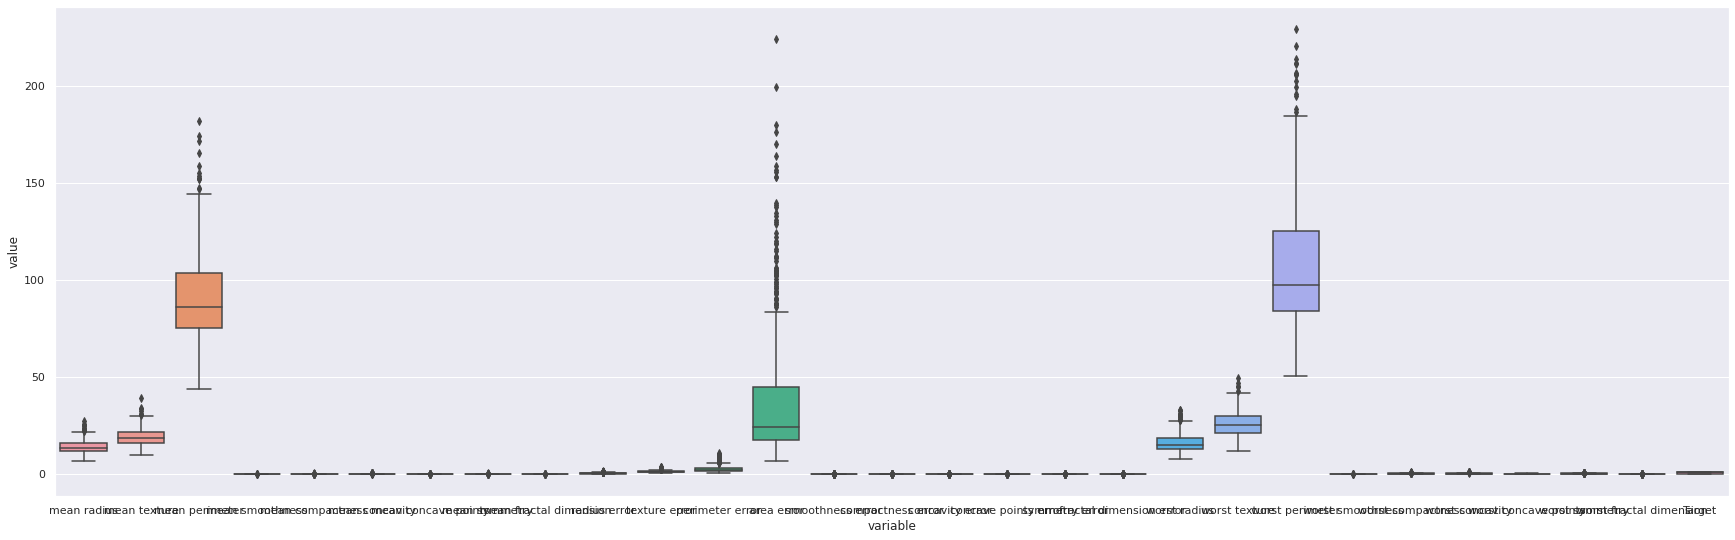

In [ ]:
boxplot(df2)

In [ ]:
from sklearn.model_selection import train_test_split
x = df2[df2.columns[:-1]]
y = df2[df2.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=2)

In [ ]:
x_train, x_test = np.asarray(x_train), np.asarray(x_test)
y_train, t_test = np.asarray(y_train), np.asarray(y_test)

## Model

In [ ]:
x = df2[df2.columns[:-1]]
y = df2[df2.columns[-1]]

x = np.asarray(x)
y = np.asarray(y)

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
embddin_dim = len(x_train)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=28, input_shape=(28,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(16, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 28)                812       
                                                                 
 dense_13 (Dense)            (None, 32)                928       
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,285
Trainable params: 2,285
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(x_train.shape)
print(y_train.shape)

(444, 28)
(444,)


In [ ]:
x = tf.convert_to_tensor(x, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.int64)

In [ ]:
# x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
# y_train = tf.convert_to_tensor(y_train, dtype=tf.int64)
# x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
# y_train = tf.convert_to_tensor(y_train, dtype=tf.int64)

In [ ]:
# a = x_train
# a = tf.expand_dims(a, axis=2)

# b = tf.constant(np.asarray([i*np.ones(a.shape[1]) for i in range(0, a.shape[0])], dtype=np.float32), dtype=tf.float32)
# b = tf.expand_dims(b, axis=2)

# x_train = tf.concat([b, a], axis=2)

In [ ]:
# a = x_test
# a = tf.expand_dims(a, axis=2)

# b = tf.constant(np.asarray([i*np.ones(a.shape[1]) for i in range(0, a.shape[0])], dtype=np.float32), dtype=tf.float32)
# b = tf.expand_dims(b, axis=2)

# x_test = tf.concat([b, a], axis=2)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(444, 28)
(444,)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
num_epochs = 100
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint  = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)
callbacks_list = [checkpoint]
history = model.fit(x_train, y_train, validation_split=0.33, epochs=num_epochs, callbacks=callbacks_list, verbose=2)

Epoch 1/100
 1/10 [==>...........................] - ETA: 4s - loss: 0.2239 - accuracy: 0.9062
Epoch 1: val_accuracy improved from -inf to 0.93197, saving model to weights-improvement-01-0.93.hdf5
10/10 [==============================] - 1s 20ms/step - loss: 0.3251 - accuracy: 0.8653 - val_loss: 0.1943 - val_accuracy: 0.9320
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.9062
Epoch 2: val_accuracy did not improve from 0.93197
10/10 [==============================] - 0s 6ms/step - loss: 0.1927 - accuracy: 0.9259 - val_loss: 0.3500 - val_accuracy: 0.8912
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.5223 - accuracy: 0.6875
Epoch 3: val_accuracy did not improve from 0.93197
10/10 [==============================] - 0s 4ms/step - loss: 0.2826 - accuracy: 0.8889 - val_loss: 0.4859 - val_accuracy: 0.8639
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4884 - accuracy: 0.8438
Epoch 4: val_accuracy did no

In [ ]:
model.load_weights("/content/weights-improvement-88-0.95.hdf5")
y_predict = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions)

Evaluate on test data
1/1 [==============================] - 0s 279ms/step - loss: 0.1974 - accuracy: 0.9369
test loss, test acc: [0.1974019855260849, 0.9369369149208069]
Generate predictions for 3 samples
1/1 [==============================] - 0s 14ms/step
predictions shape: [[0.9718068 ]
 [0.071618  ]
 [0.99731344]]


# MNIST

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)

(1000, 28, 28) (1000, 10)


In [ ]:
# unlike the Medium article, I am not encapsulating this process in a separate class
# I think it is nice just like this
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),
    SoftmaxLayer(10)
]

epochs = 40
learning_rate = 0.1

# training
for epoch in range(epochs):
    error = 0
    i=0
    for x, y_true in zip(x_train, y_train):
        i+=1
        # forward
        output = x
        # print(output.shape, y_true.shape)
        for layer in network:
            output = layer.forward(output)
            # print(output.shape)

        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    # print(i)
    error /= len(x_train)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/40, error=0.090923
2/40, error=0.090692
3/40, error=0.090511
4/40, error=0.090362
5/40, error=0.090233
6/40, error=0.090118
7/40, error=0.090012
8/40, error=0.089915
9/40, error=0.089823
10/40, error=0.089736
11/40, error=0.089653
12/40, error=0.089575
13/40, error=0.089499
14/40, error=0.089426
15/40, error=0.089357
16/40, error=0.089291
17/40, error=0.089227
18/40, error=0.089166
19/40, error=0.089110
20/40, error=0.089058
21/40, error=0.089010
22/40, error=0.088966
23/40, error=0.088926
24/40, error=0.088889
25/40, error=0.088854
26/40, error=0.088822
27/40, error=0.088791
28/40, error=0.088763
29/40, error=0.088737
30/40, error=0.088711
31/40, error=0.088687
32/40, error=0.088664
33/40, error=0.088641
34/40, error=0.088620
35/40, error=0.088598
36/40, error=0.088577
37/40, error=0.088557
38/40, error=0.088538
39/40, error=0.088520
40/40, error=0.088503


In [ ]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

ratio: 0.20
mse: 0.0889


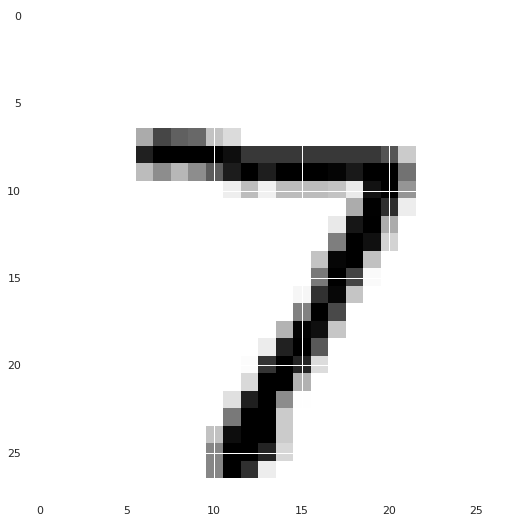

pred: 7, prob: 0.15, true: 7


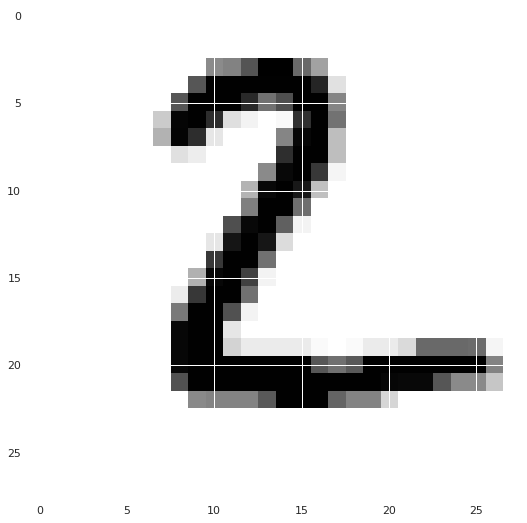

pred: 1, prob: 0.12, true: 2


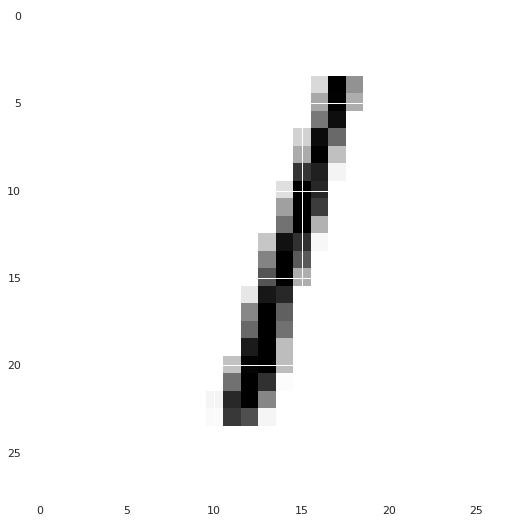

pred: 7, prob: 0.12, true: 1


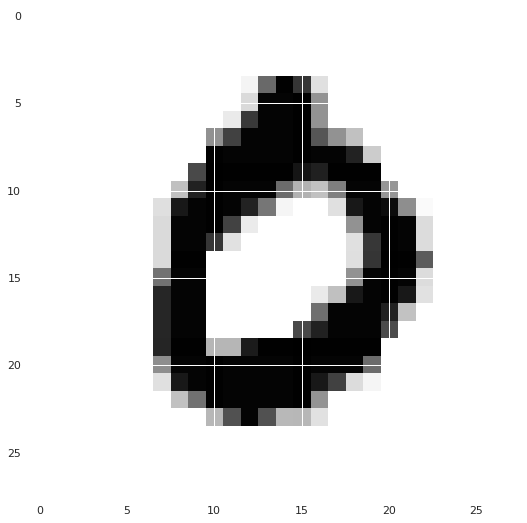

pred: 4, prob: 0.12, true: 0


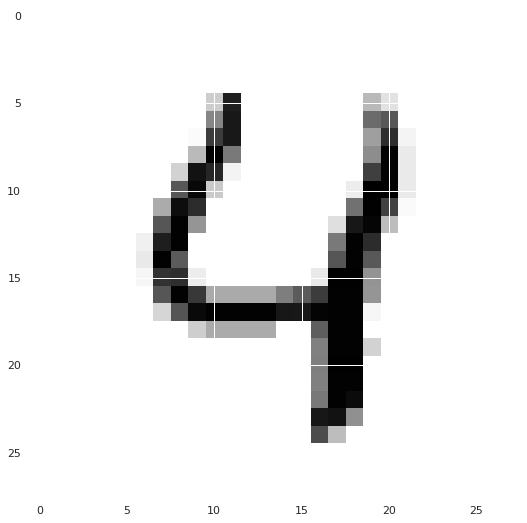

pred: 7, prob: 0.14, true: 4


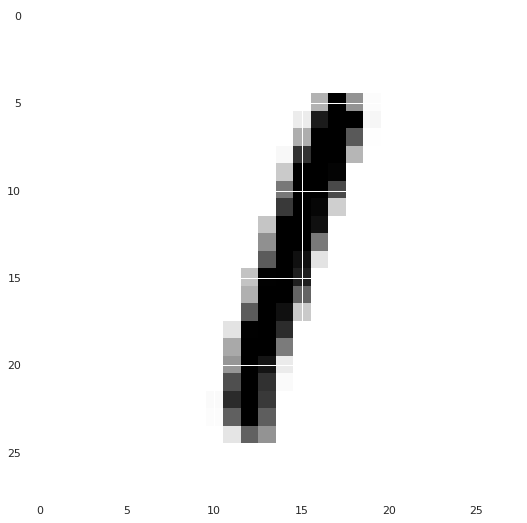

pred: 1, prob: 0.13, true: 1


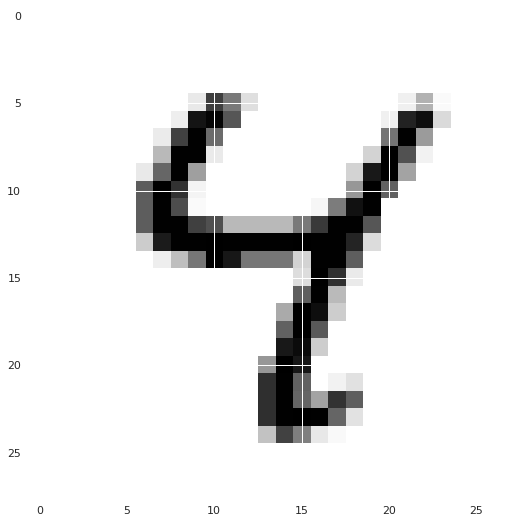

pred: 7, prob: 0.14, true: 4


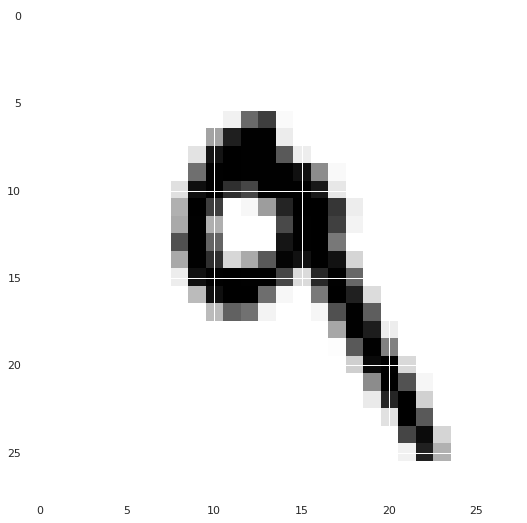

pred: 7, prob: 0.12, true: 9


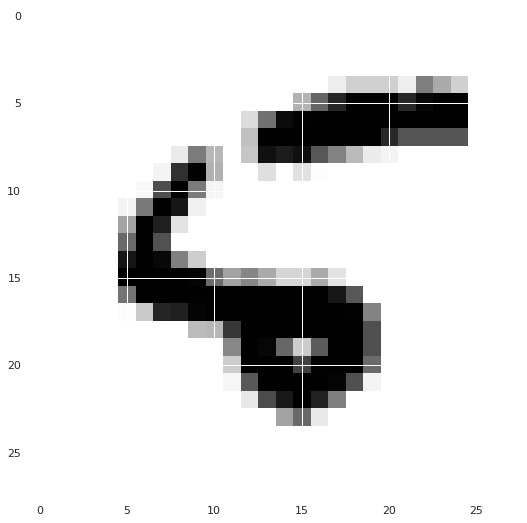

pred: 4, prob: 0.13, true: 5


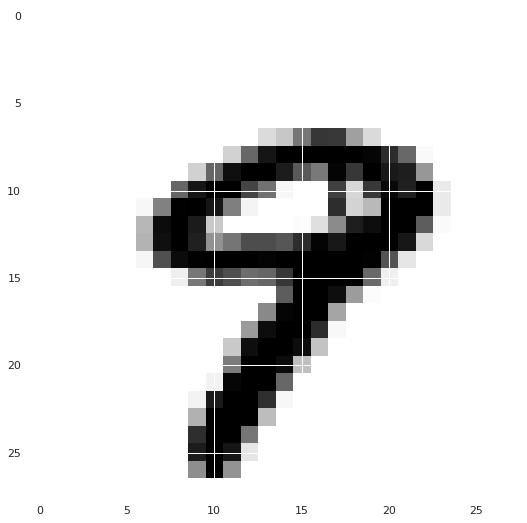

pred: 1, prob: 0.12, true: 9


In [ ]:
import matplotlib.pyplot as plt

samples = 10
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.2f, true: %d' % (idx, pred[idx], idx_true))

Ref: https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65